## **Consumo de Energia**

In [535]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

## **Tratamento dos Dados**


In [536]:
path = r"C:/Users/brcpwmftomaz/OneDrive - Oregon Tool/Desktop/Uso Privado/walassseee.github.io/posts/energy_consumption/powerconsumption.csv"
energy = pd.read_csv(path, sep=",",decimal=".").round(3)
energy.head(2)

,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.696,16128.875,20240.964
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.684,19375.076,20131.084


In [537]:
energy["Datetime"] = pd.to_datetime(energy["Datetime"], format="%m/%d/%Y %H:%M")

In [538]:
energy["PowerConsumption_Total"] = energy.apply(lambda linha: (linha["PowerConsumption_Zone1"] + linha["PowerConsumption_Zone2"] + linha["PowerConsumption_Zone2"]), axis=1)

In [539]:
energy.head(2)

,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3,PowerConsumption_Total
0,2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.696,16128.875,20240.964,66313.446
1,2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.684,19375.076,20131.084,68564.836


In [540]:
energy["Date"] = energy["Datetime"].dt.date
energy.head(2)

,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3,PowerConsumption_Total,Date
0,2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.696,16128.875,20240.964,66313.446,2017-01-01
1,2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.684,19375.076,20131.084,68564.836,2017-01-01


In [541]:
energy_day = energy.groupby(by="Date").agg({
    'Temperature' : 'mean',
    'Humidity'    : 'mean',
    'WindSpeed'   : 'mean',
    'DiffuseFlows': 'mean',
    'GeneralDiffuseFlows': 'mean',
    'PowerConsumption_Zone1': 'sum',
    'PowerConsumption_Zone2': 'sum',
    'PowerConsumption_Zone3': 'sum',
    'PowerConsumption_Total': 'sum'
}).reset_index().round(3)
energy_day.head(2)

,Date,Temperature,Humidity,WindSpeed,DiffuseFlows,GeneralDiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3,PowerConsumption_Total
0,2017-01-01,9.675,68.519,0.315,25.994,121.391,4098993.419,2554241.943,2573106.503,9207477.305
1,2017-01-02,12.477,71.456,0.077,27.227,120.404,4157207.087,2816312.464,2566189.879,9789832.015


In [542]:
energy_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    364 non-null    object 
 1   Temperature             364 non-null    float64
 2   Humidity                364 non-null    float64
 3   WindSpeed               364 non-null    float64
 4   DiffuseFlows            364 non-null    float64
 5   GeneralDiffuseFlows     364 non-null    float64
 6   PowerConsumption_Zone1  364 non-null    float64
 7   PowerConsumption_Zone2  364 non-null    float64
 8   PowerConsumption_Zone3  364 non-null    float64
 9   PowerConsumption_Total  364 non-null    float64
dtypes: float64(9), object(1)
memory usage: 28.6+ KB


In [543]:
from great_tables import GT

In [544]:
(
    GT(energy_day[["Date", "PowerConsumption_Total"]].rename(columns={"PowerConsumption_Total":"Consumption"}).head(5).round(1))
    .tab_header(title="Dados de Consumo de Energia")
)

GT(_tbl_data=         Date  Consumption
0  2017-01-01    9207477.3
1  2017-01-02    9789832.0
2  2017-01-03   10177486.0
3  2017-01-04   10208733.9
4  2017-01-05   10205394.3, _body=<great_tables._gt_data.Body object at 0x000001BDBDEDEF30>, _boxhead=Boxhead([ColInfo(var='Date', type=<ColInfoTypeEnum.default: 1>, column_label='Date', column_align='right', column_width=None), ColInfo(var='Consumption', type=<ColInfoTypeEnum.default: 1>, column_label='Consumption', column_align='right', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x000001BDBF946E10>, _spanners=Spanners([]), _heading=Heading(title='Dados de Consumo de Energia', subtitle=None, preheader=None), _stubhead=None, _source_notes=[], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x000001BDBDEDFFC0>, _formats=[], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_additional_css=OptionsInfo(scss=False, category='table', type='values', value=[]), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans-serif']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='16px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_color=OptionsInfo(scss=True, category='table', type='value', value='#333333'), table_font_color_light=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_border_top_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_top_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_top_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_top_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_right_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_right_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_right_color=OptionsInfo(scss=True, category='table', type='value', value='#D3D3D3'), table_border_bottom_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_bottom_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_bottom_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_bottom_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_left_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_left_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_left_color=OptionsInfo(scss=True, category='table', type='value', value='#D3D3D3'), heading_background_color=OptionsInfo(scss=True, category='heading', type='value', value=None), heading_align=OptionsInfo(scss=True, category='heading', type='value', value='center'), heading_title_font_size=OptionsInfo(scss=True, category='heading', type='px', value='125%'), heading_title_font_weight=OptionsInfo(scss=True, category='heading', type='value', value='initial'), heading_subtitle_font_size=OptionsInfo(scss=True, category

In [545]:
energy_day[["Date", "PowerConsumption_Total"]].head(5).round(1)

,Date,PowerConsumption_Total
0,2017-01-01,9207477.3
1,2017-01-02,9789832.0
2,2017-01-03,10177486.0
3,2017-01-04,10208733.9
4,2017-01-05,10205394.3


## **Gráficos**

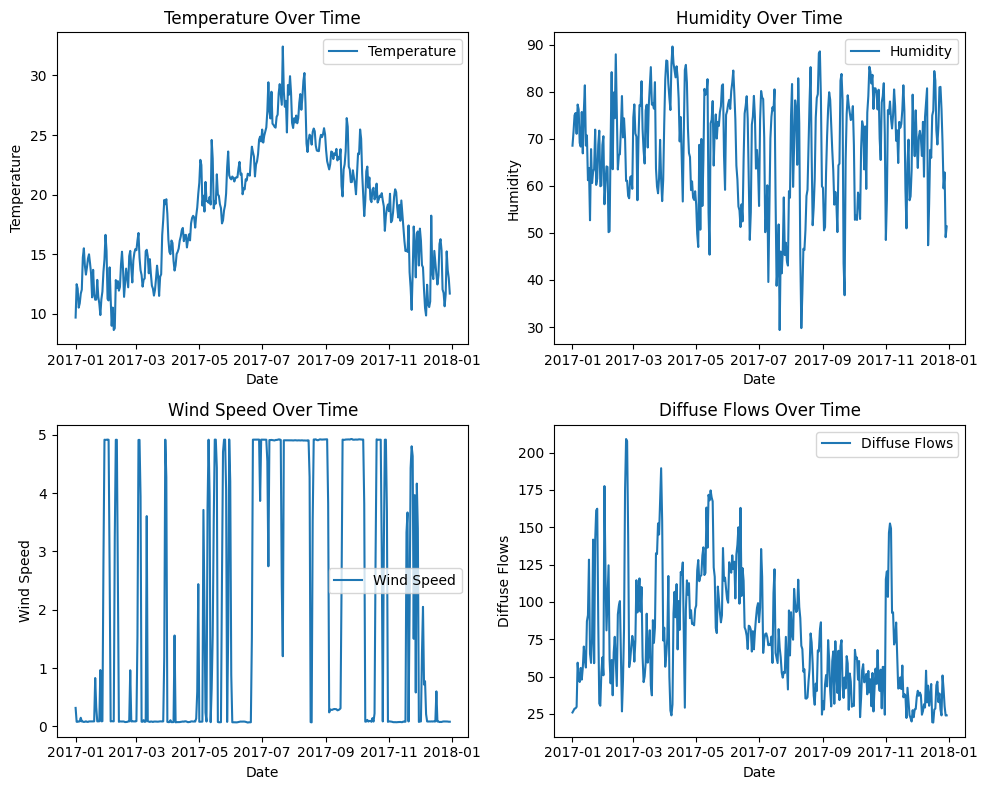

In [546]:
plt.figure(figsize=(10, 8))
plt.subplot(2,2,1)
plt.plot(energy_day["Date"], energy_day["Temperature"], label="Temperature")
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.title("Temperature Over Time")
plt.legend()

plt.subplot(2,2,2)
plt.plot(energy_day["Date"], energy_day["Humidity"], label="Humidity")
plt.xlabel("Date")
plt.ylabel("Humidity")
plt.title("Humidity Over Time")
plt.legend()

plt.subplot(2,2,3)
plt.plot(energy_day["Date"], energy_day["WindSpeed"], label="Wind Speed")
plt.xlabel("Date")
plt.ylabel("Wind Speed")
plt.title("Wind Speed Over Time")
plt.legend()

plt.subplot(2,2,4)
plt.plot(energy_day["Date"], energy_day["DiffuseFlows"], label="Diffuse Flows")
plt.xlabel("Date")
plt.ylabel("Diffuse Flows")
plt.title("Diffuse Flows Over Time")
plt.legend()

plt.tight_layout()
plt.show()

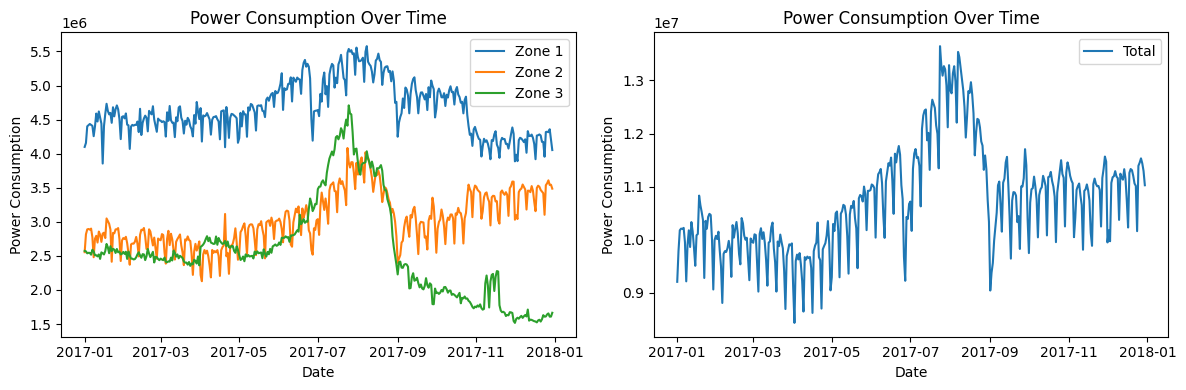

In [547]:
plt.figure(figsize=(12, 4))

plt.subplot(1,2,1)
plt.plot(energy_day["Date"], energy_day["PowerConsumption_Zone1"], label="Zone 1")
plt.plot(energy_day["Date"], energy_day["PowerConsumption_Zone2"], label="Zone 2")
plt.plot(energy_day["Date"], energy_day["PowerConsumption_Zone3"], label="Zone 3")
plt.xlabel("Date")
plt.ylabel("Power Consumption")
plt.title("Power Consumption Over Time")
plt.legend()

plt.subplot(1,2,2)
plt.plot(energy_day["Date"], energy_day["PowerConsumption_Total"], label="Total")
plt.xlabel("Date")
plt.ylabel("Power Consumption")
plt.title("Power Consumption Over Time")
plt.legend()

plt.tight_layout()
plt.show()

In [548]:
energy_day["PowerConsumption_Total"] = energy_day["PowerConsumption_Total"] / 1_000_000

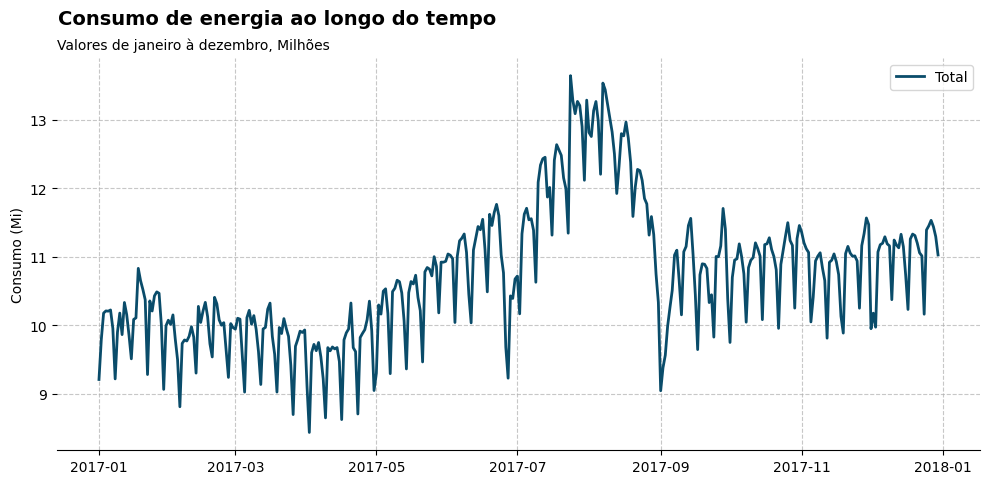

In [549]:

plt.figure(figsize=(10, 5))
plt.plot(energy_day["Date"], energy_day["PowerConsumption_Total"], label="Total", color="#0a4c6a", linewidth=2)
plt.xlabel("")
plt.ylabel("Consumo (Mi)")
plt.title("Valores de janeiro à dezembro, Milhões", loc='left', fontsize=10)
plt.suptitle("Consumo de energia ao longo do tempo", x=0.063, y=0.96, ha='left', fontsize=14, fontweight='bold')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

plt.legend()
plt.tight_layout()
plt.savefig("grafico_consumo_energia.png", format='png', dpi=300)
plt.show()

In [550]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [551]:
energy_day['Date'] = pd.to_datetime(energy_day['Date'])
energy_dec = energy_day.copy()
energy_dec.set_index('Date', inplace=True)
result = seasonal_decompose(energy_dec['PowerConsumption_Total'], model='additive')

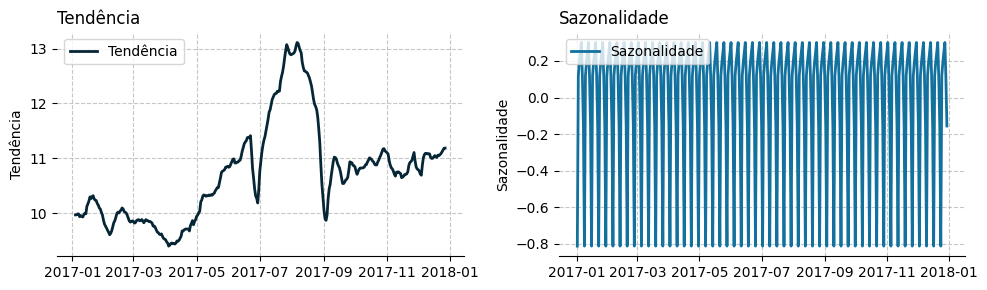

In [552]:
plt.figure(figsize=(10, 3))

plt.subplot(1, 2, 1)
plt.plot(result.trend.index, result.trend, label="Tendência", color="#062635", linewidth=2)
plt.title("Tendência", fontsize=12, loc='left')
plt.ylabel("Tendência")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.legend(loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(result.seasonal.index, result.seasonal, label="Sazonalidade", color="#12719e", linewidth=2)
plt.title("Sazonalidade", fontsize=12, loc='left')
plt.ylabel("Sazonalidade")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.legend(loc='upper left')

plt.tight_layout()
plt.savefig("grafico_decomposicao_energia.png", format='png', dpi=300)
plt.show()

## **Estatísticas**

In [553]:
adf_test = adfuller(energy_day["PowerConsumption_Total"])
adf_results = pd.DataFrame({
    'Estatística ADF': [adf_test[0]],
    'p-value': [adf_test[1]],
    'N° lags': [adf_test[2]],
    'N° observações': [adf_test[3]],
    'Valor crítico 1%': [adf_test[4]['1%']],
    'Valor crítico 5%': [adf_test[4]['5%']],
    'Valor crítico 10%': [adf_test[4]['10%']]
}).round(4)

(
    GT(adf_results)
    .tab_header("Resultado do Teste de Estacionariedade em Nível")
)

GT(_tbl_data=   Estatística ADF  p-value  N° lags  N° observações  Valor crítico 1%  \
0          -1.7801   0.3904       14             349           -3.4492   

   Valor crítico 5%  Valor crítico 10%  
0           -2.8699            -2.5712  , _body=<great_tables._gt_data.Body object at 0x000001BDC3ABC730>, _boxhead=Boxhead([ColInfo(var='Estatística ADF', type=<ColInfoTypeEnum.default: 1>, column_label='Estatística ADF', column_align='right', column_width=None), ColInfo(var='p-value', type=<ColInfoTypeEnum.default: 1>, column_label='p-value', column_align='right', column_width=None), ColInfo(var='N° lags', type=<ColInfoTypeEnum.default: 1>, column_label='N° lags', column_align='right', column_width=None), ColInfo(var='N° observações', type=<ColInfoTypeEnum.default: 1>, column_label='N° observações', column_align='right', column_width=None), ColInfo(var='Valor crítico 1%', type=<ColInfoTypeEnum.default: 1>, column_label='Valor crítico 1%', column_align='right', column_width=None), ColInfo(var='Valor crítico 5%', type=<ColInfoTypeEnum.default: 1>, column_label='Valor crítico 5%', column_align='right', column_width=None), ColInfo(var='Valor crítico 10%', type=<ColInfoTypeEnum.default: 1>, column_label='Valor crítico 10%', column_align='right', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x000001BDC1057410>, _spanners=Spanners([]), _heading=Heading(title='Resultado do Teste de Estacionariedade em Nível', subtitle=None, preheader=None), _stubhead=None, _source_notes=[], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x000001BDC3ABF3E0>, _formats=[], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_additional_css=OptionsInfo(scss=False, category='table', type='values', value=[]), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans-serif']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='16px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_color=OptionsInfo(scss=True, category='table', type='value', value='#333333'), table_font_color_light=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_border_top_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_top_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_top_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_top_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_right_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_right_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_right_color=OptionsInfo(scss=True, category='table', type='value', value='#D3D3D3'), table_border_bottom_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_bottom_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_bottom_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_bottom_co

In [554]:
energy_day["PowerConsumption_TotalPct"] = energy_day["PowerConsumption_Total"].pct_change().fillna(0)

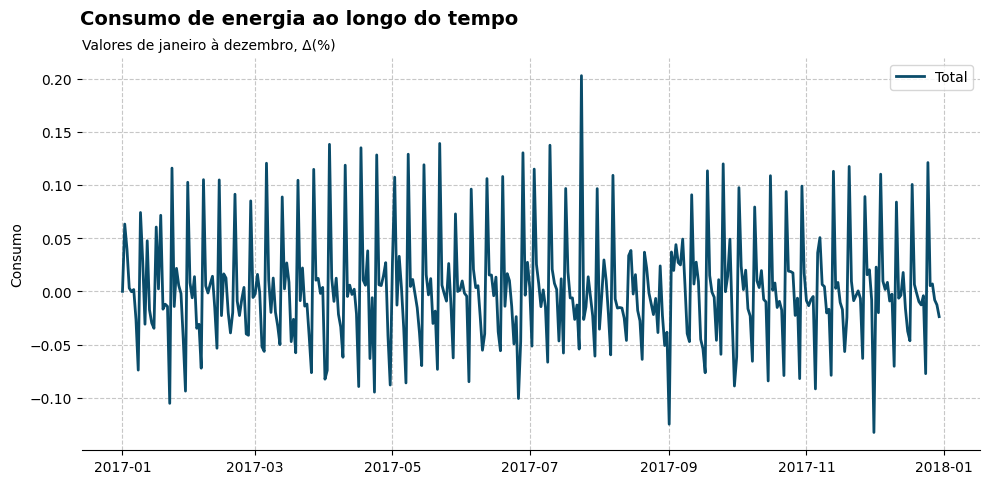

In [555]:
plt.figure(figsize=(10, 5))
plt.plot(energy_day["Date"], energy_day["PowerConsumption_TotalPct"], label="Total", color="#0a4c6a", linewidth=2)
plt.xlabel("")
plt.ylabel("Consumo")
plt.title("Valores de janeiro à dezembro, Δ(%)", loc='left', fontsize=10)
plt.suptitle("Consumo de energia ao longo do tempo", x=0.085, y=0.96, ha='left', fontsize=14, fontweight='bold')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

plt.legend()
plt.tight_layout()
plt.savefig("grafico_consumo_energia_pct.png", format='png', dpi=300)
plt.show()

In [556]:
adf_test = adfuller(energy_day["PowerConsumption_TotalPct"])
adf_results = pd.DataFrame({
    'Estatística ADF': [adf_test[0]],
    'p-value': [adf_test[1]],
    'N° lags': [adf_test[2]],
    'N° observações': [adf_test[3]],
    'Valor crítico 1%': [adf_test[4]['1%']],
    'Valor crítico 5%': [adf_test[4]['5%']],
    'Valor crítico 10%': [adf_test[4]['10%']]
}).round(4)

(
    GT(adf_results)
    .tab_header("Resultado do Teste de Estacionariedade em I(1)")
)

GT(_tbl_data=   Estatística ADF  p-value  N° lags  N° observações  Valor crítico 1%  \
0          -5.4686      0.0       13             350           -3.4492   

   Valor crítico 5%  Valor crítico 10%  
0           -2.8698            -2.5712  , _body=<great_tables._gt_data.Body object at 0x000001BDC116E0D0>, _boxhead=Boxhead([ColInfo(var='Estatística ADF', type=<ColInfoTypeEnum.default: 1>, column_label='Estatística ADF', column_align='right', column_width=None), ColInfo(var='p-value', type=<ColInfoTypeEnum.default: 1>, column_label='p-value', column_align='right', column_width=None), ColInfo(var='N° lags', type=<ColInfoTypeEnum.default: 1>, column_label='N° lags', column_align='right', column_width=None), ColInfo(var='N° observações', type=<ColInfoTypeEnum.default: 1>, column_label='N° observações', column_align='right', column_width=None), ColInfo(var='Valor crítico 1%', type=<ColInfoTypeEnum.default: 1>, column_label='Valor crítico 1%', column_align='right', column_width=None), ColInfo(var='Valor crítico 5%', type=<ColInfoTypeEnum.default: 1>, column_label='Valor crítico 5%', column_align='right', column_width=None), ColInfo(var='Valor crítico 10%', type=<ColInfoTypeEnum.default: 1>, column_label='Valor crítico 10%', column_align='right', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x000001BDBFFB5850>, _spanners=Spanners([]), _heading=Heading(title='Resultado do Teste de Estacionariedade em I(1)', subtitle=None, preheader=None), _stubhead=None, _source_notes=[], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x000001BDC116C500>, _formats=[], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_additional_css=OptionsInfo(scss=False, category='table', type='values', value=[]), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans-serif']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='16px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_color=OptionsInfo(scss=True, category='table', type='value', value='#333333'), table_font_color_light=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_border_top_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_top_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_top_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_top_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_right_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_right_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_right_color=OptionsInfo(scss=True, category='table', type='value', value='#D3D3D3'), table_border_bottom_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_bottom_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_bottom_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_bottom_col

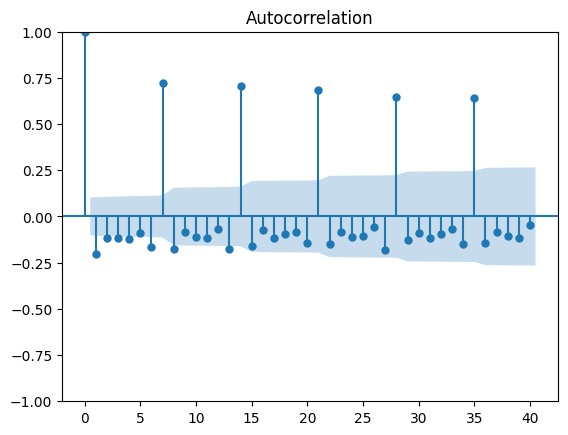

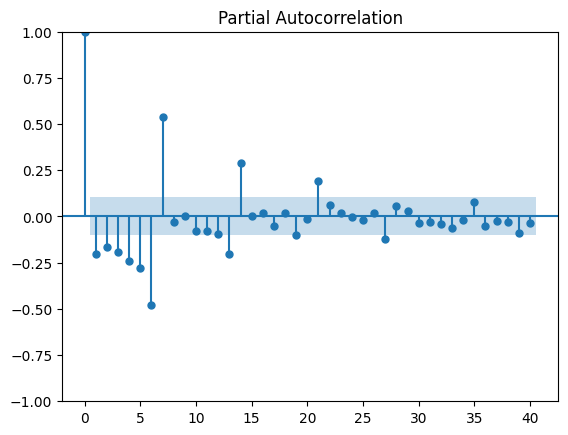

In [557]:
plot_acf(energy_day["PowerConsumption_TotalPct"], lags=40)
plot_pacf(energy_day["PowerConsumption_TotalPct"], lags=40)
plt.show()

In [558]:
model = SARIMAX(endog = energy_day["PowerConsumption_Total"], order = (1, 1, 1), seasonal_order = (1, 1, 1, 7))
model_res = model.fit(disp=0)
summary = model_res.summary()
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:            PowerConsumption_Total   No. Observations:                  364
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 7)   Log Likelihood                 -63.335
Date:                           Thu, 14 Nov 2024   AIC                            136.670
Time:                                   14:06:06   BIC                            156.045
Sample:                                        0   HQIC                           144.377
                                           - 364                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6035      0.098      6.181      0.000       0.412       0.795
ma.L1         -0.7840      0.080     -9.844      0.000      -0.940      -0.628
ar.S.L7        0.0401      0.054      0.746      0.456      -0.065       0.146
ma.S.L7       -0.9982      0.536     -1.863      0.062      -2.048       0.052
sigma2         0.0775      0.040      1.926      0.054      -0.001       0.156
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):              1864.61
Prob(Q):                              0.86   Prob(JB):                         0.00
Heteroskedasticity (H):               1.30   Skew:                            -1.39
Prob(H) (two-sided):                  0.15   Kurtosis:                        13.86
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [559]:
energy_day["PowerConsumption_TotalPredict"] = model_res.predict()

In [560]:
test_split = int(len(energy_day["PowerConsumption_Total"]) * 0.65)
test_split

236

<Axes: >

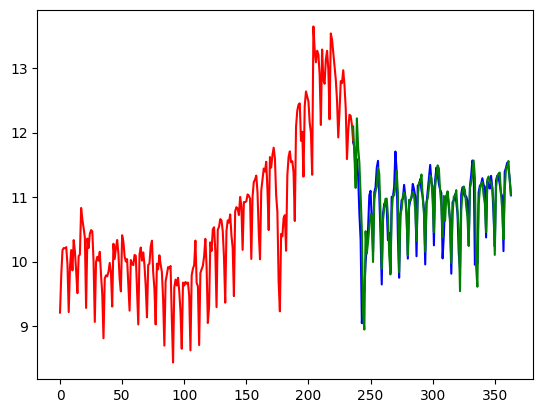

In [561]:
energy_day["PowerConsumption_Total"][:test_split+1].plot(color="red")
energy_day["PowerConsumption_Total"][test_split:].plot(color="blue")
energy_day["PowerConsumption_TotalPredict"][test_split:].plot(color="green")

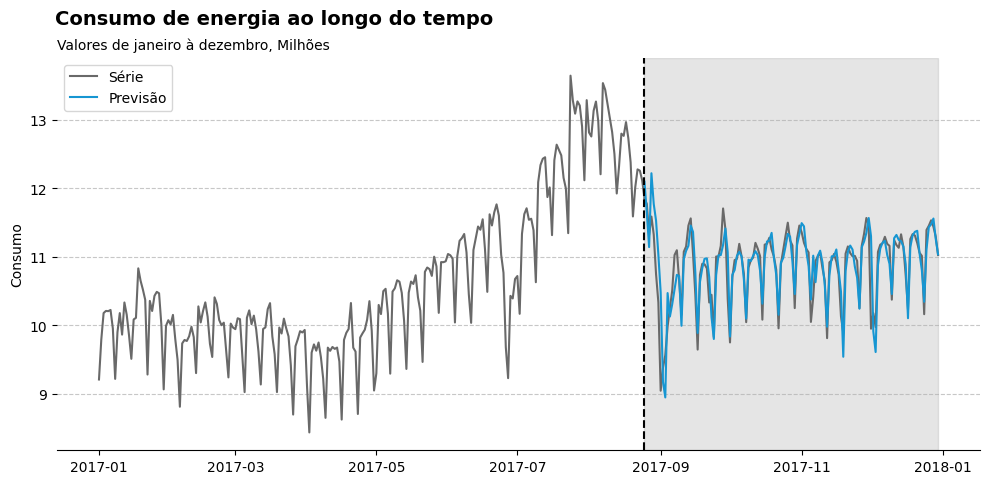

In [578]:
plt.figure(figsize=(10, 5))

plt.plot(energy_day["Date"][:test_split+1], energy_day["PowerConsumption_Total"][:test_split+1], color="#696969", label="Série")
plt.plot(energy_day["Date"][test_split:], energy_day["PowerConsumption_Total"][test_split:], color="#696969", label="")
plt.plot(energy_day["Date"][test_split:], energy_day["PowerConsumption_TotalPredict"][test_split:], color="#1696d2", label="Previsão")

plt.axvline(x=energy_day["Date"].iloc[test_split], color='black', linestyle='--', label="")
plt.axvspan(energy_day["Date"].iloc[test_split], energy_day["Date"].iloc[-1], color='gray', alpha=0.2)

plt.xlabel("")
plt.ylabel("Consumo")
plt.title("Valores de janeiro à dezembro, Milhões", loc='left', fontsize=10)
plt.suptitle("Consumo de energia ao longo do tempo", x=0.06, y=0.96, ha='left', fontsize=14, fontweight='bold')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

plt.legend()
plt.tight_layout()
plt.savefig("grafico_consumo_energia_prevsito.png", format='png', dpi=300)
plt.show()

In [581]:
from sklearn.metrics import mean_squared_error
import numpy as np

In [584]:
real_values = energy_day["PowerConsumption_Total"][test_split:]
predicted_values = energy_day["PowerConsumption_TotalPredict"][test_split:]

mse = mean_squared_error(real_values, predicted_values)
rmse = np.sqrt(mse)
print(f"RMSE: {rmse:.3f}")

RMSE: 0.291
